# Prosper loan data analysis
## by Juliette Lefranc

## Investigation Overview

> In this analysis, we will be aiming at highlighting the features in a borrower's loan application that have the most impact on their final APR.


## Dataset Overview

> There are 113,937 loans in the dataset and 81 variables. Most variables are numerical (Float64) but there are also some categorical variables such as the borrower's occupation or employment status that have strong potential in influencing the final APR.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# high-level overview of data shape and composition
print(loan_data.shape)

(113937, 81)


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
#Looking at one column in particular
loan_data['ListingCategory (numeric)']

0          0
1          2
2          0
3         16
4          2
          ..
113932     1
113933     7
113934     1
113935     2
113936     1
Name: ListingCategory (numeric), Length: 113937, dtype: int64

### What is the structure of your dataset?

> There are 113937 loans in the dataset and 81 variables on each loan. Most variables are numerical (Float64) but there are also some categorical variables such as the borrower's occupation or employment status that have strong potential in influencing the final loan outcome status or interest rate. Some variables such as ListingCategory (numeric) are int64 but should be dealt with as categorical data and completed with information from the variables definition document. For this analysis, we will focus on numerical and categorical variables that are directly linked to the borrower and are highly likely to influence their loan status and interest rate.
 
 
### What is/are the main feature(s) of interest in your dataset?

> We are interested in understanding what features in a loan inquiry had the most impact on borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Bowrrower's related information:


 - BankcardUtilization
 - CurrentDelinquencies
 - PercentFunded
 - CreditGrade
 - Recommendations
 - Occupation
 - ListingCategory (numeric)
 - IsBorrowerHomeowner
 - OpenRevolvingMonthlyPayment
 - OpenRevolvingAccounts
 - InquiriesLast6Months
 - PublicRecordsLast10Years
 - IncomeRange
 - StatedMonthlyIncome
 - Investors
 
 Loan outcome information:
 
  - LoanStatus
  - Term
  - LoanOriginalAmount
  - MonthlyLoanPayment
  - BorrowerAPR

We create a new dataframe with only the columns we are interested in:

In [8]:
loan_data_clean = loan_data[['ListingKey','CurrentDelinquencies','Occupation','Recommendations', 'ListingCategory (numeric)', 'IsBorrowerHomeowner','CreditGrade', 'OpenRevolvingMonthlyPayment', 'OpenRevolvingAccounts', 'InquiriesLast6Months', 'PublicRecordsLast10Years', 'IncomeRange', 'StatedMonthlyIncome', 'Investors', 'LoanStatus', 'Term', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerAPR']].copy()

In [9]:
loan_data_clean.head()

,ListingKey,CurrentDelinquencies,Occupation,Recommendations,ListingCategory (numeric),IsBorrowerHomeowner,CreditGrade,OpenRevolvingMonthlyPayment,OpenRevolvingAccounts,InquiriesLast6Months,PublicRecordsLast10Years,IncomeRange,StatedMonthlyIncome,Investors,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR
0,1021339766868145413AB3B,2.0,Other,0,0,True,C,24.0,1,3.0,0.0,"$25,000-49,999",3083.333333,258,Completed,36,9425,330.43,0.16516
1,10273602499503308B223C1,0.0,Professional,0,2,False,NaN,389.0,13,3.0,1.0,"$50,000-74,999",6125.000000,1,Current,36,10000,318.93,0.12016
2,0EE9337825851032864889A,1.0,Other,0,0,False,HR,0.0,0,0.0,0.0,Not displayed,2083.333333,41,Completed,36,3001,123.32,0.28269
3,0EF5356002482715299901A,4.0,Skilled Labor,0,16,True,NaN,115.0,7,0.0,0.0,"$25,000-49,999",2875.000000,158,Current,36,10000,321.45,0.12528
4,0F023589499656230C5E3E2,0.0,Executive,0,2,True,NaN,220.0,6,1.0,0.0,"$100,000+",9583.333333,20,Current,36,15000,563.97,0.24614


## Univariate Exploration

### Loan outcome data

We start the exploration with the variables related to the loans themselves. The borrower's APR will be one of our main variable of interest when analysing which borrowers got the best interest rates and positive loan status.

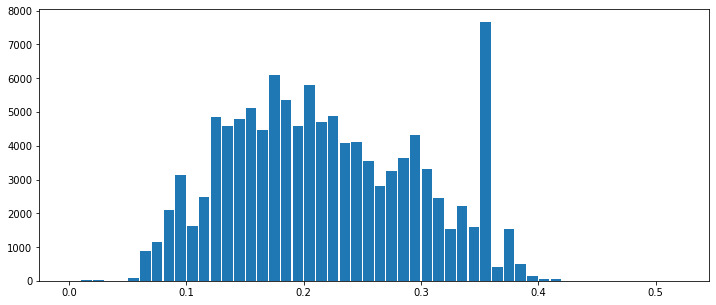

In [10]:
plt.figure(figsize=[12, 5])
bin_edges_APR = np.arange(0, loan_data['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = loan_data_clean, x = 'BorrowerAPR', bins = bin_edges_APR, rwidth = 0.9);

In [11]:
loan_data_clean.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

Interestingly, there is an important peak of interest rates set at 0.35%. Let's now have a look at the loan statuses:

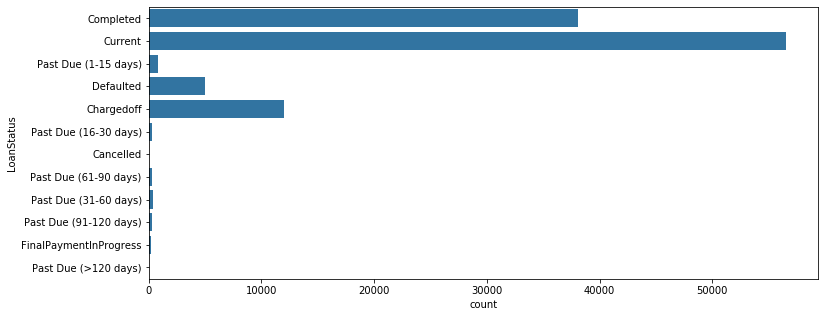

In [12]:
plt.figure(figsize=[12, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data_clean, y = 'LoanStatus', color = base_color);

Most loans have a status of "completed" or "Current", which are positive statuses when about 15000 are either defaulted, chargedoff or have past due payments. In the next steps of our analysis, we will probably want to compare loan statuses that have been completed against those that have defaulted, have past due payments or have been charged off. We can now have a look at the loans original amount and monthly payments.

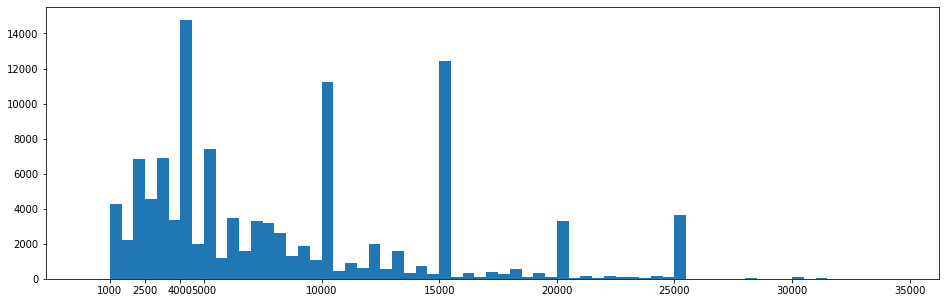

In [13]:
plt.figure(figsize=[16, 5])
bin_edges_amount = np.arange(0,(loan_data['LoanOriginalAmount'].max()),500)
plt.hist(data = loan_data_clean, x = 'LoanOriginalAmount', bins = bin_edges_amount);
tick_locs = [1000, 2500, 4000, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
plt.xticks(tick_locs, tick_locs);

Common loan amounts are $4000, $5000, $10000 and $15000.

In [14]:
loan_data.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

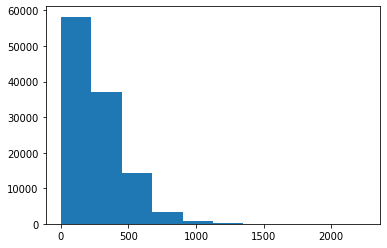

In [15]:
plt.hist(data = loan_data, x = 'MonthlyLoanPayment');

The data is skewed to the right but we can see that most monthly payments are inferior to $1000.

In [16]:
loan_data.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

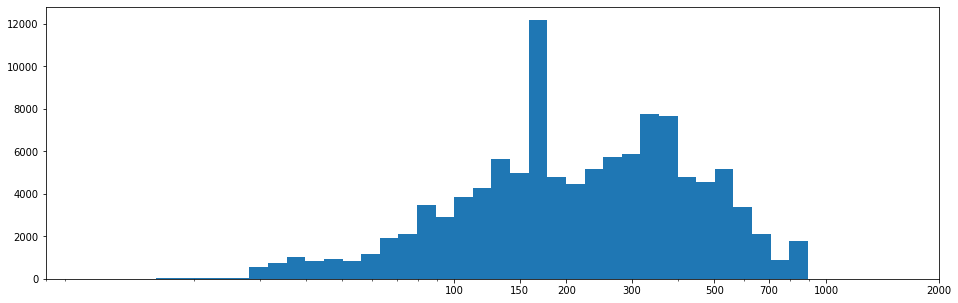

In [17]:
plt.figure(figsize=[16, 5])
bins_payments = 10 ** np.arange(1, 2+1, 0.05)
plt.hist(data = loan_data_clean, x = 'MonthlyLoanPayment', bins = bins_payments)
plt.xscale('log')
tick_locs = [100, 150, 200, 300, 500,700, 1000, 2000]
plt.xticks(tick_locs, tick_locs);

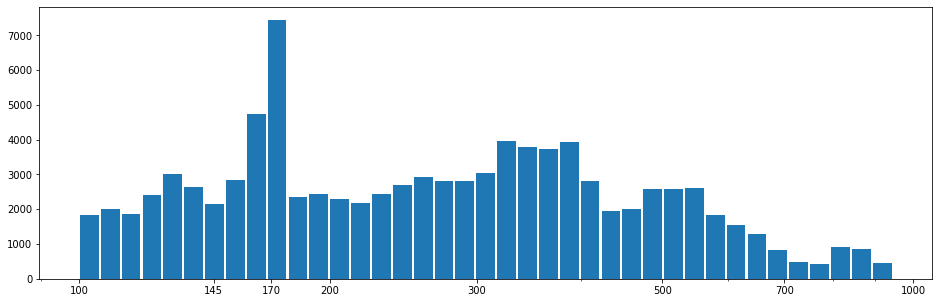

In [18]:
plt.figure(figsize=[16, 5])
bins_payments2 = 10 ** np.arange(2, 2+1, 0.025)
plt.hist(data = loan_data_clean, x = 'MonthlyLoanPayment', bins = bins_payments2, rwidth = 0.9)
plt.xscale('log')
tick_locs = [100, 145,170, 200, 300, 500,700, 1000]
plt.xticks(tick_locs, tick_locs);

When we log scale the distribution of monthly payments for loans and zoom in, we can see that most monthly payments are between $100 and $1000. A very common monthly payment is $170. We can now have a quick look at common terms for loans.

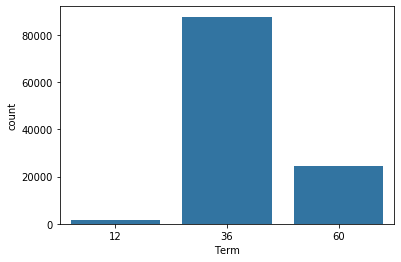

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data_clean, x = 'Term', color = base_color);

Most loans have a 36 months term.

### Variables

In this section we will focus our exploratory analysis on independent variables that are likely to influence interest rates and loan outcomes of borrowers. We start with checking which is the most common reason for a borrower to request a loan.

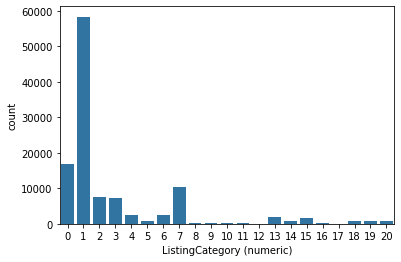

In [20]:
sb.countplot(data = loan_data_clean, x = 'ListingCategory (numeric)', color = base_color);

The most common reason borrowers give when submitting  loan application is "debt consolidation". As this value corresponds to the 1st one we might be cautious on how to interpret this result. It might be selected often in a form if this is the default option. The other most frequent reason given are "other" and "Not available" indicating that the multiple choices available may not be exhaustive enough.

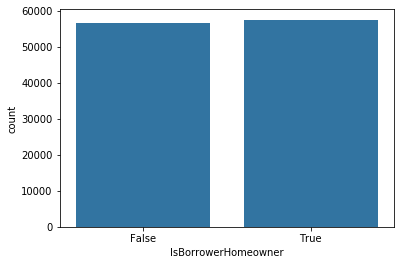

In [21]:
sb.countplot(data = loan_data_clean, x = 'IsBorrowerHomeowner', color = base_color);

Half of the borrowers are homeowners and the other half is not.

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


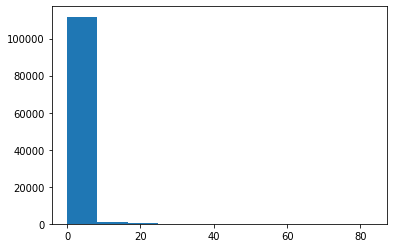

In [22]:
plt.hist(data = loan_data_clean, x = 'CurrentDelinquencies');

Most poeple don't have any deliquencies

In [23]:
loan_data_clean.CurrentDelinquencies.describe()

count    113240.000000
mean          0.592052
std           1.978707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

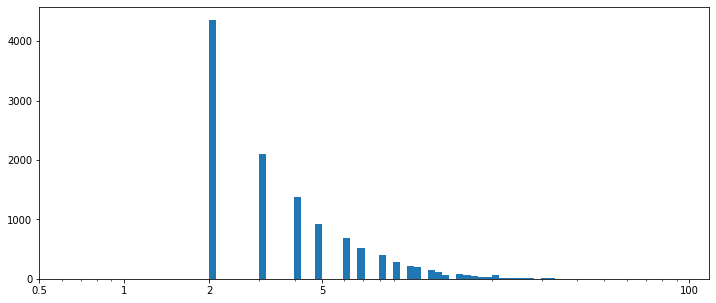

In [24]:
plt.figure(figsize=[12, 5])
bins_del = 10 ** np.arange(0.1, 1+1, 0.025)
plt.hist(data = loan_data_clean, x = 'CurrentDelinquencies', bins = bins_del)
plt.xscale('log')
tick_locs = [0.5, 1,2, 5, 100]
plt.xticks(tick_locs, tick_locs);

A few thousands people have 2 deliquencies or more.

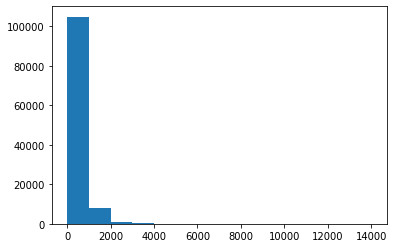

In [25]:
bin_edges_credit_up = np.arange(0,(loan_data_clean['OpenRevolvingMonthlyPayment'].max()),1000)
plt.hist(data = loan_data_clean, x = 'OpenRevolvingMonthlyPayment', bins = bin_edges_credit_up);

In [26]:
loan_data_clean.OpenRevolvingMonthlyPayment.describe()

count    113937.000000
mean        398.292161
std         447.159711
min           0.000000
25%         114.000000
50%         271.000000
75%         525.000000
max       14985.000000
Name: OpenRevolvingMonthlyPayment, dtype: float64

The open revolving monthly payment variable is extremely skewed to the right, with 75% of loans counting 525 or less payments. To have better visibility on this variable, we need to zoom in and transforn the axis to log the scale.

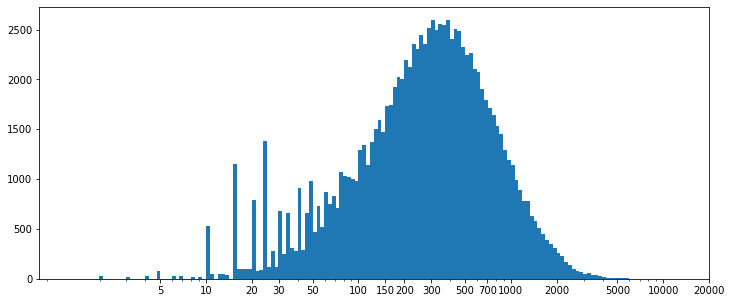

In [27]:
plt.figure(figsize=[12, 5])
bins_rev = 10 ** np.arange(0.1, 3+1, 0.025)
plt.hist(data = loan_data_clean, x = 'OpenRevolvingMonthlyPayment', bins = bins_rev)
plt.xscale('log')
tick_locs = [5, 10, 20 ,30, 50,100, 150, 200, 300, 500,700, 1000,2000,5000, 10000, 20000]
plt.xticks(tick_locs, tick_locs);

Thanks to the log scale, we can see that most borrowers have between 10 and 5000 monthly payments in their revolving accounts, the most frequent situation being 300 to 500 accounts. There are also a few spikes at around 10, 15, 20, 25 and 50.

We will now have a look at the number of open revolving accounts borrowers own.

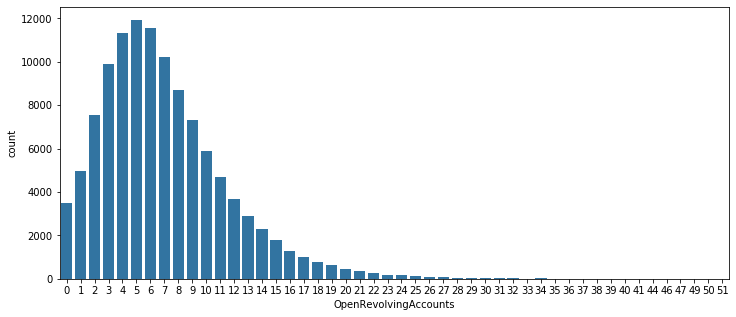

In [28]:
plt.figure(figsize=[12, 5])
sb.countplot(data = loan_data_clean, x = 'OpenRevolvingAccounts', color = base_color);

In [29]:
loan_data_clean.OpenRevolvingAccounts.describe()

count    113937.00000
mean          6.96979
std           4.63097
min           0.00000
25%           4.00000
50%           6.00000
75%           9.00000
max          51.00000
Name: OpenRevolvingAccounts, dtype: float64

Most borrowers have between 2 and 9 accounts. We will now have a look at the number of inquiries borrowers made before their loan profile was pulled. A high number of inquiries might show that the borrower is very proactive in the loan process, has maybe shopped around and managed to get more interesting rates than others. 

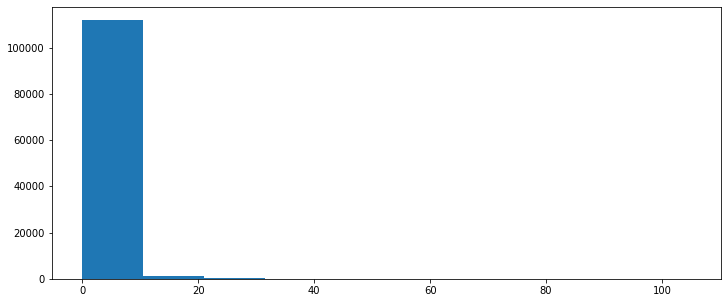

In [30]:
plt.figure(figsize=[12, 5])
plt.hist(data = loan_data_clean, x = 'InquiriesLast6Months');
tick_locs = [0, 1, 2, 3, 4, 5, 10, 20]

Most borrowers inquired less than 20 times, we need to zoom into the graph to have more visibility on the typical number of inquiries.

(0, 20)

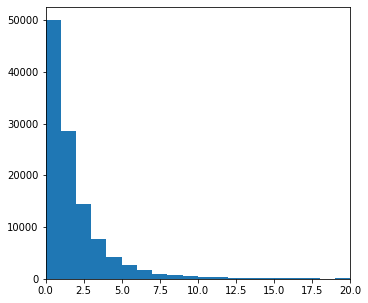

In [31]:
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 2)
bin_inq = np.arange(0, 20+1, 1)
plt.hist(data = loan_data_clean, x = 'InquiriesLast6Months', bins = bin_inq)
plt.xlim(0, 20)

Most borrowers inquired less than 3 times or did not inquire at all. We will now have a look at public records of borrowers.

In [32]:
loan_data_clean.InquiriesLast6Months.describe()

count    113240.000000
mean          1.435085
std           2.437507
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         105.000000
Name: InquiriesLast6Months, dtype: float64

We will need to look at proportions for this specific variable to understand which percentages of borrowers have public records and which have not.

Text(0, 0.5, 'proportion')

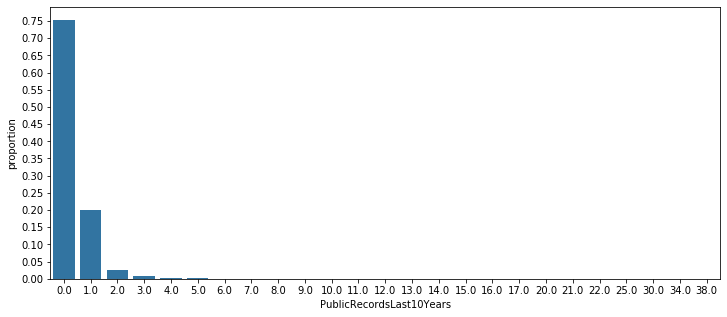

In [33]:
plt.figure(figsize = [12, 5])
# get proportion taken by most common group for derivation
# of tick marks
n_points = loan_data_clean.shape[0]
max_count = loan_data_clean['PublicRecordsLast10Years'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data_clean, x = 'PublicRecordsLast10Years', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

75% of borrowers did not have any public records and 20% of them had just one.

In [34]:
loan_data_clean.PublicRecordsLast10Years.describe()

count    113240.000000
mean          0.312646
std           0.727868
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: PublicRecordsLast10Years, dtype: float64

We will now focus our analysis on borrower's income range. We start by converting the income range into an ordered categorical type.

In [35]:
income_range_ordered = {'IncomeRange':['Not displayed','Not employed','$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in income_range_ordered:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = income_range_ordered[var])
    loan_data_clean[var] = loan_data_clean[var].astype(ordered_var)

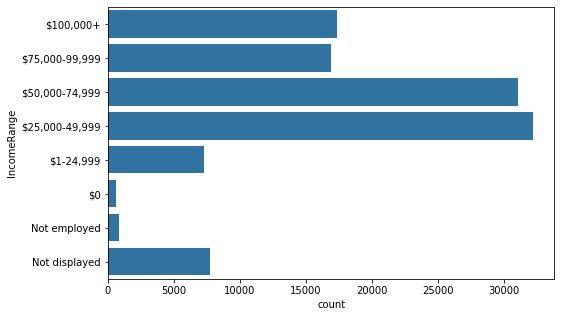

In [36]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data_clean, y = 'IncomeRange', color = base_color);
plt.gca().invert_yaxis()

In [37]:
loan_data_clean.IncomeRange.tail(500)

113437    $50,000-74,999
113438     Not displayed
113439    $25,000-49,999
113440    $25,000-49,999
113441         $1-24,999
               ...      
113932    $50,000-74,999
113933    $75,000-99,999
113934    $25,000-49,999
113935    $25,000-49,999
113936    $50,000-74,999
Name: IncomeRange, Length: 500, dtype: category
Categories (8, object): [Not displayed < Not employed < $0 < $1-24,999 < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < $100,000+]

We will also have a look at the equivalent numerical variable: StatedMonthlyIncome. We will keep both variables for our analysis as it can be handy to keep a categorical and a numerical verison of this variable.

In [38]:
loan_data_clean.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

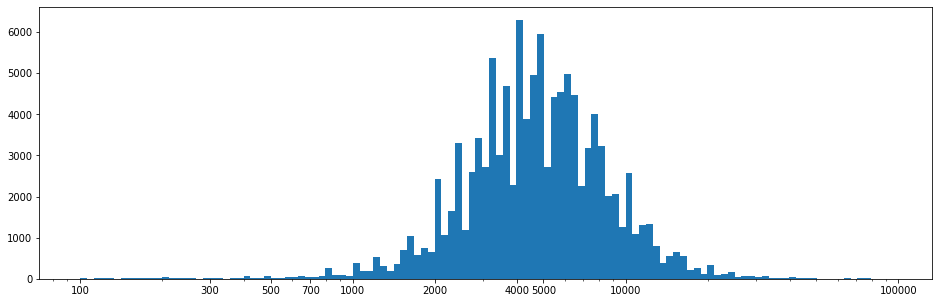

In [39]:
plt.figure(figsize=[16, 5])
bins_stated_inc = 10 ** np.arange(2, 4+1, 0.025)
plt.hist(data = loan_data, x = 'StatedMonthlyIncome', bins = bins_stated_inc)
plt.xscale('log')
tick_locs = [100, 300, 500,700, 1000, 2000, 4000, 5000, 10000, 100000]
plt.xticks(tick_locs, tick_locs);

Most borrowers' incomeb range from $25k to $75k. $4k is the most common monthly income. Let's now have a look at investments coming from borrowers' friends.

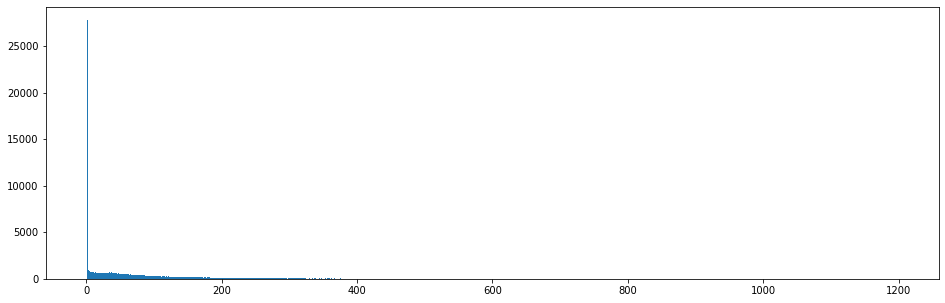

In [40]:
plt.figure(figsize=[16, 5])
bin_edges_inv = np.arange(0, 1200, 1)
plt.hist(data = loan_data, x = 'Investors', bins = bin_edges_inv);

In [41]:
loan_data.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

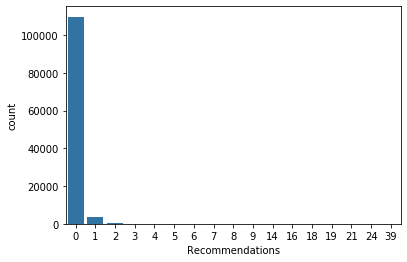

In [42]:
sb.countplot(data = loan_data_clean, x = 'Recommendations', color = base_color);

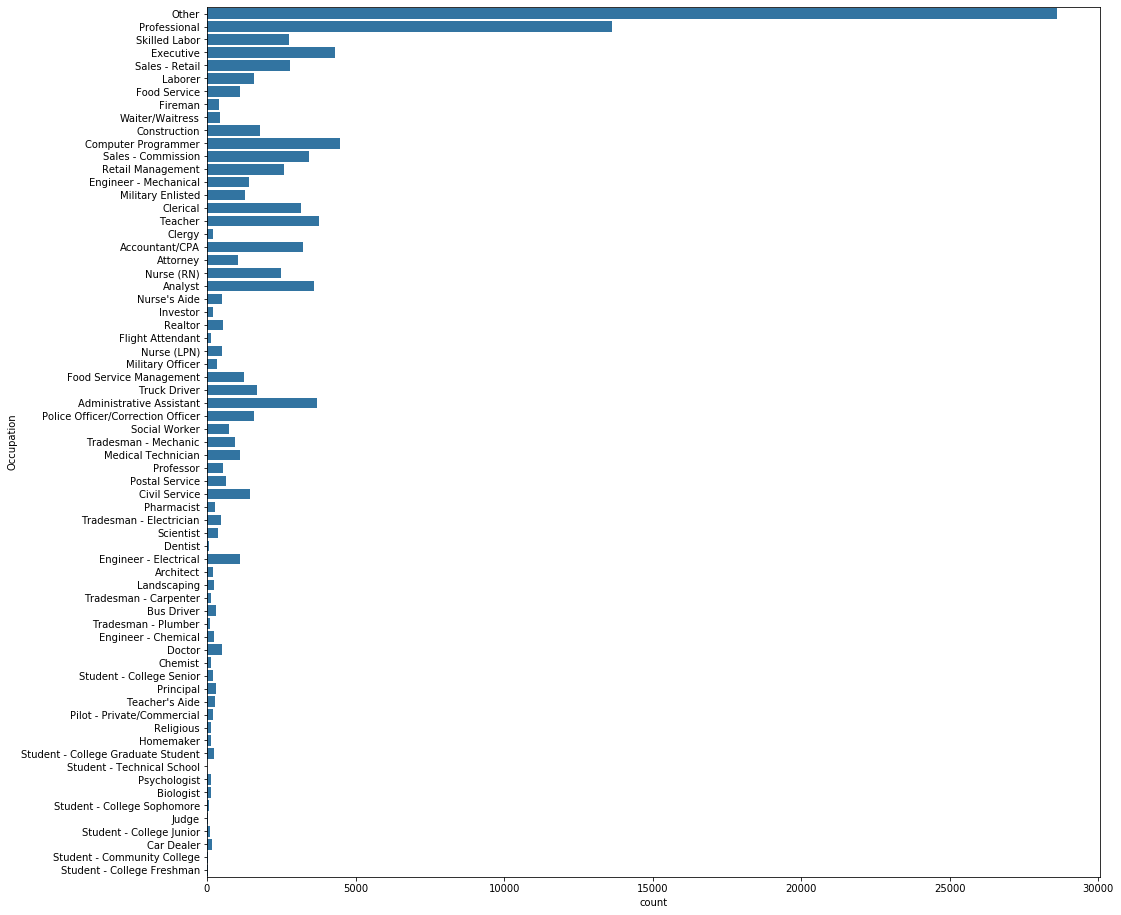

In [43]:
plt.figure(figsize=[16, 16])
sb.countplot(data = loan_data_clean, y = 'Occupation', color = base_color);

Most borrowers don't have any extra investors, however for those who have, they can have up until a few hundreds of them. They also generally don't come recommended, apart from a few who have one or two recommendations. The large majority of people did not find their occupation in the list which reduces greatly the volume on which we will be able to perform a bivariate analysis between occupation and borrower's APR.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We had to log scale to study the monthly payments, CurrentDelinquencies and open revolving payments variable as all of those were skewed to the right. To analyse the public record variable, we looked at proportions instead of actuals.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> This first univariate exploration of the data did not show anything visibly wrong with the data itself. No cleaning tasks seem to be necessary. We will however keep in mind that only some categories of loan status will be of interest for our analysis: Completed, Past due, defaulted and charged off. We will also need to compare loans with the same term going further to make sure our bivariate and multivariate analysis are accurate.

## Bivariate Exploration

We separate variables into categorical and numerical ones to facilitate bivariate analysis. We will also only compare loans with the same amount.

In [44]:
numeric_vars = ['CreditGrade','OpenRevolvingMonthlyPayment','Recommendations','CurrentDelinquencies', 'InquiriesLast6Months', 'PublicRecordsLast10Years', 'StatedMonthlyIncome', 'Investors', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerAPR', 'Term']
categoric_vars = ['CreditGrade','Occupation','IsBorrowerHomeowner', 'IncomeRange', 'LoanStatus', 'ListingCategory (numeric)']





In [45]:
loan_data_36 = loan_data_clean.query('Term == 36')

Firstly, we will use faceting to see at a glance what numerical variables show strong correlations with APR. To make sure the data is easily readable, we will plot the scatter matrix on a sample of 500 loans.

NameError: name 'titl' is not defined

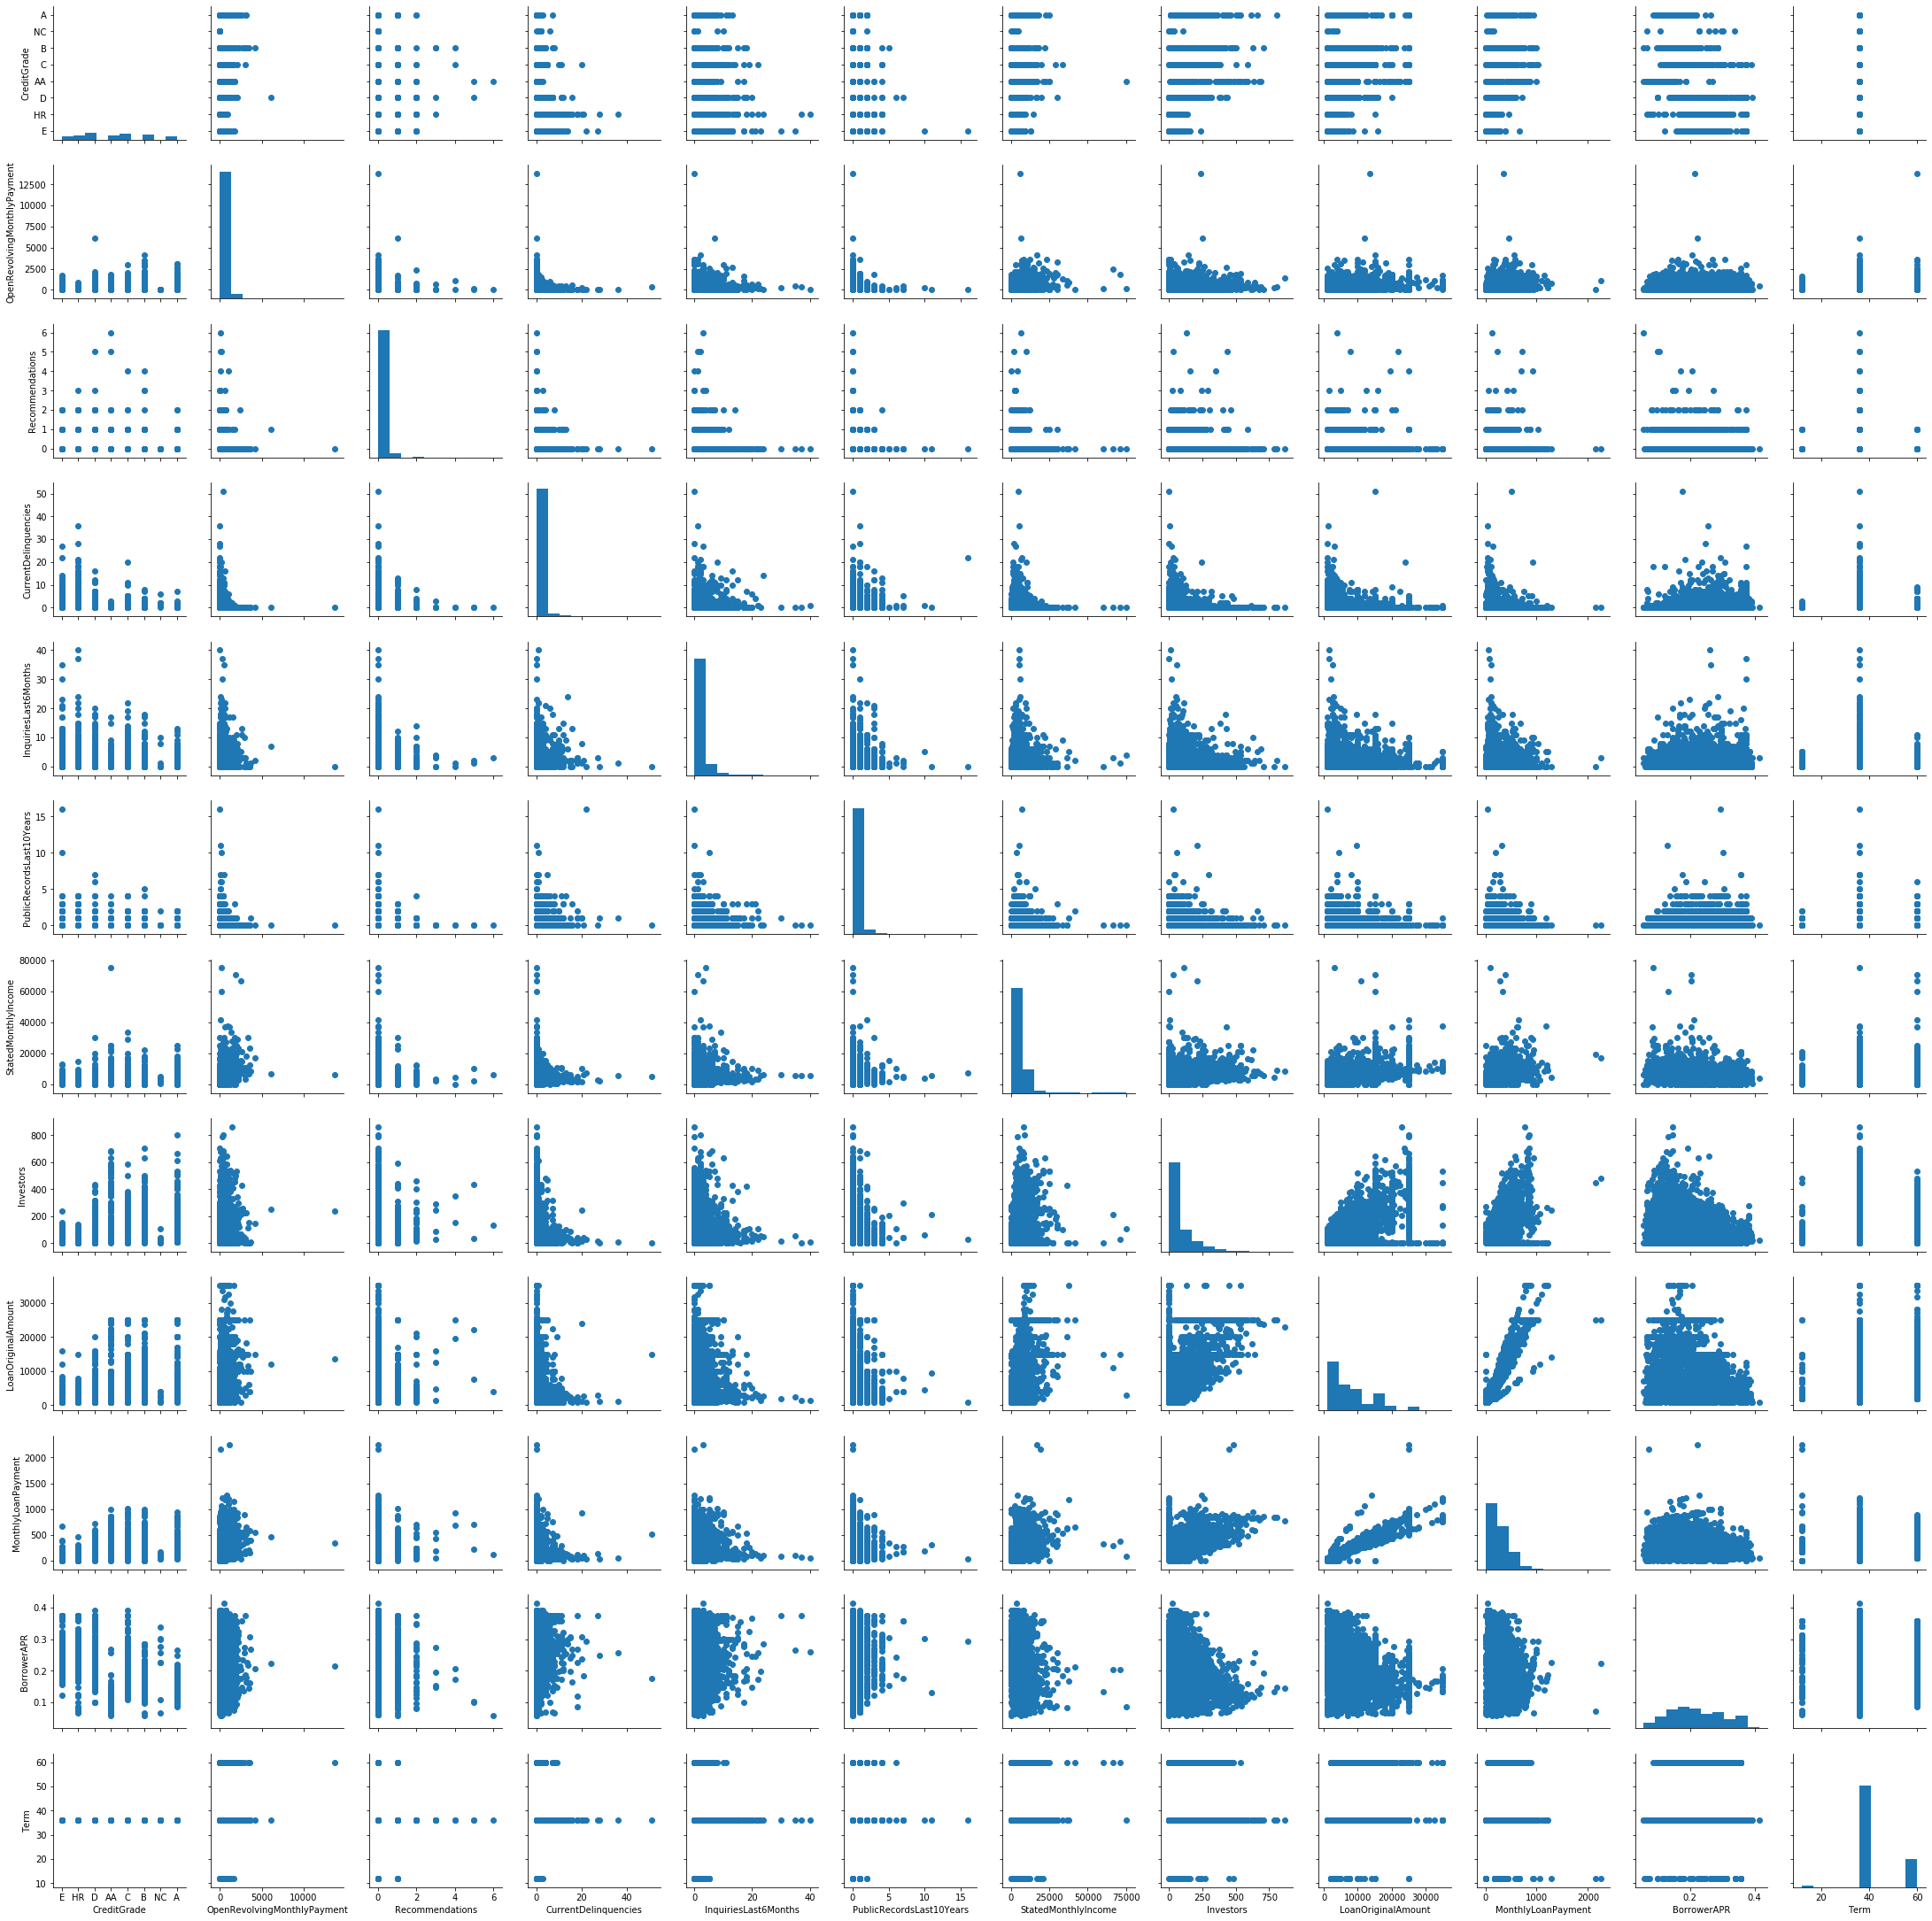

In [46]:
# plot matrix: sample 5000 loans so that plots are clearer and
# they render faster
samples = np.random.choice(loan_data_clean.shape[0], 5000, replace = False)
loan_data_clean_samp = loan_data_clean.loc[samples,:]

g = sb.PairGrid(data = loan_data_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter)
plt.title = titl

In [ ]:
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

When looking at the "Borrower APR" column, no strong correlation is visible straight away. The heatmap confirms that no variables share strong correlation apart from Monthly loan payments and loan amount. There is moderate correlation between loan amounts and investors, and borrowers' APR and investors. 

It seems that borrower's APR tend to be determined by many factors and they don't correlate with each unique numerical variable one by one. A few things are still visible though. 

It is clear that the amount of deliquencies has a negative effect on the borrower's APR. For borrowers who have no deliquencies the APR ranges from minimum to maximum, showing that potantially many other variables have an impact, but when the number of deliquencies increases APR increases as well.

The number of inquiries in the last 6 months also seems to have a negative impact on APR, however the correlation is not systematic.

Public records also tend to have a negative impact on APR. It would be interesting to have a look at this variable and APR in a box plot and deal with public records as a categorical variable to have a better visibility on the correlation.

The stated monthly income doesn't seem to have an influence on the borrower's APR, however, when looking at the histogram for this variable, we see that all points apart from one are gathered in the very first bin. We will need to analyse APR and monthly income in a separate chart to be able to 

A high number of investor seem to impact positively APR.

Loan amount and APR don't correlate however very high APR are more frequent on low loan amount.

Also, long term loans (60 months) tend to be superior to 0.1%.

Let's now have a closer look at public records and stated monthly income.

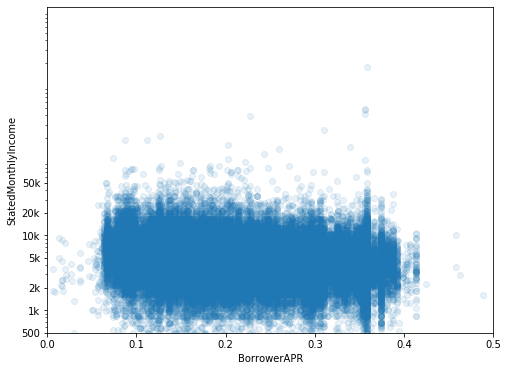

In [47]:
plt.figure(figsize = [8, 6])
plt.scatter(data = loan_data_36, x = 'BorrowerAPR', y = 'StatedMonthlyIncome',  alpha = 1/10)
plt.xlim([0, 0.5])
plt.xlabel('BorrowerAPR')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.ylabel('StatedMonthlyIncome')
plt.show()

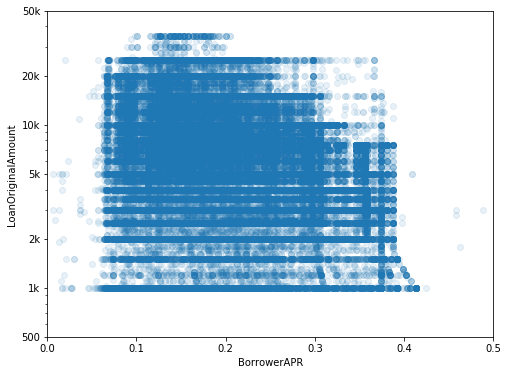

In [48]:
plt.figure(figsize = [8, 6])
plt.scatter(data = loan_data_36, x = 'BorrowerAPR', y = 'LoanOriginalAmount',  alpha = 1/10)
plt.xlim([0, 0.5])
plt.xlabel('BorrowerAPR')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.ylabel('LoanOriginalAmount')
plt.show()

Even looking at the bulk of the borrowers APR range (0.0 to 0.5) we can see that there is no correlation between monthly income and APR. Looking at original loan amount it seems like the higher the amount and the more likely the APR will be inferior to 0.3.

Now we will move on to the bivariate analysis of categorical variables against Borrowers APR

In [49]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['AA','A','B','C','D', 'E','HR','NC'],
                    'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_data_clean[var] = loan_data_clean[var].astype(ordered_var)

In [50]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['AA','A','B','C','D', 'E','HR','NC'],
                    'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_data_36[var] = loan_data_36[var].astype(ordered_var)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


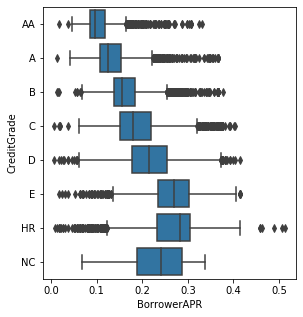

In [51]:
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_data_36, x = 'BorrowerAPR', y = 'CreditGrade', color = base_color)

Credit scores and borrower's APR are correlated, the better the grade, the lower the APR.

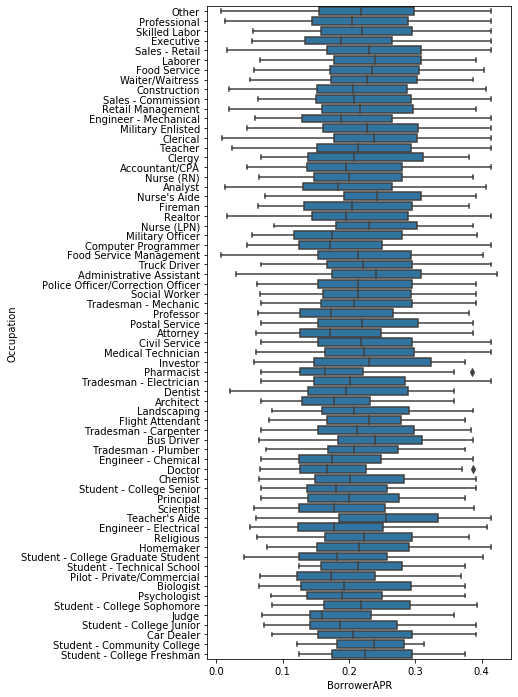

In [52]:
plt.figure(figsize = [12, 12])
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_data_36, x = 'BorrowerAPR', y = 'Occupation', color = base_color)

Looking at the median APR for all occupations, we can see that high earning professions tend to get lower APR: Engineers, doctors, judges, when lower income professions tend to have higher median rates (laborers, nurse aide). This would need to be corroborated by our income range anaysis.

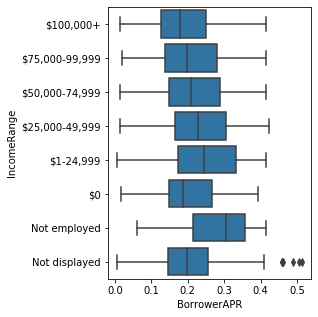

In [53]:
plt.figure(figsize = [8, 5])
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_data_36, x = 'BorrowerAPR', y = 'IncomeRange', color = base_color)
plt.gca().invert_yaxis()

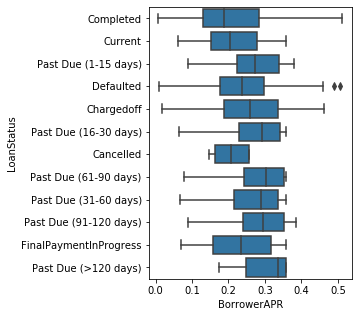

In [54]:
plt.figure(figsize = [8, 5])
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_data_36, x = 'BorrowerAPR', y = 'LoanStatus', color = base_color)

Here we can see clearly the correlation between income range and APR level. This categorical analysis enables us to see that the higher the income the lower the APR, which was not clear when looking at the numerical variable "Statedmonthly income". Interestingly, borrowers stating an income of $0 don't seem to be impacted by higher APR rate like unemployed do. Thes borrowers might belong to a differenttype of borrowers who can't prove income through employment and don't have this variable taken into account.

It is also interesting to notice that the predictions from Prosper seem to be exact as the "completed" loans are those who had the lowest APR, when the "Past due" listings are those with the highest APR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Interestingly, categorical variables were found to have more impact on final borrowers' APR than numerical variables. The most visible correlation we witnessed was between the borrowers' APR and their income range.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a moderate correlation between investors and loan amount, indicating that borrowers are more likely to diversify their investors when loan amount is high.

## Multivariate Exploration

Now that we can use more than two variables at a time for analysis, we can add the different term lenghts to the plot.

Lets' first have a look at the relation between borrower's income, loan amount and APR.

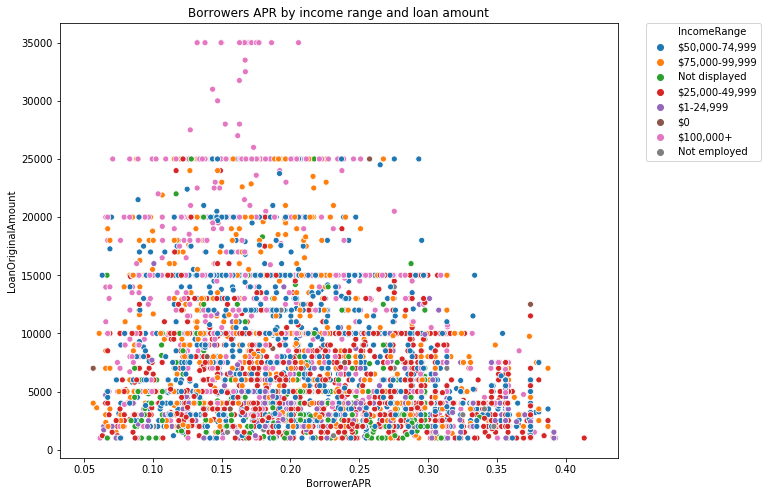

In [55]:
plt.figure(figsize = [10, 8])
## Here we reuse the sample created for the bivariate faceting scatter plot to improve readability
sb.scatterplot(data = loan_data_clean_samp, y = 'LoanOriginalAmount', hue = 'IncomeRange', x = 'BorrowerAPR');
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad = 0.)
plt.title('Borrowers APR by income range and loan amount');

Borrowers with very high income (superior to $100,000) are the only ones who manage to get a loan up to $35000 worth. Interestingly their APR does not skyrocket with the amount increasing. When getting to the $25k range for loan amount, borrowers' income get more diverse with more frequent blue and green dots.

As we go lower in the range of loan amounts, purple dots become more frequent and APR ranges are much wider making APR disparities less noticeable.

It would now be interesting to have a closer look at borrower's occupation and understand to which degree this information influence their final APR. Is borrower's occupation really taken into account into the calculation of the APR, or is this variable just a simple reflection of their income which is the variable who has shown the stronger correlation in this analysis so far.

In [56]:
non_income = loan_data_clean[(loan_data_clean['IncomeRange']=='Not displayed')].index

In [57]:
non_income2 = loan_data_clean[(loan_data_clean['IncomeRange']=='Not employed')].index

In [58]:
non_income3 = loan_data_clean[(loan_data_clean['IncomeRange']=='$0')].index

In [59]:
loan_data_clean.drop(non_income, inplace = True)
loan_data_clean.drop(non_income2, inplace = True)
loan_data_clean.drop(non_income3, inplace = True)

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


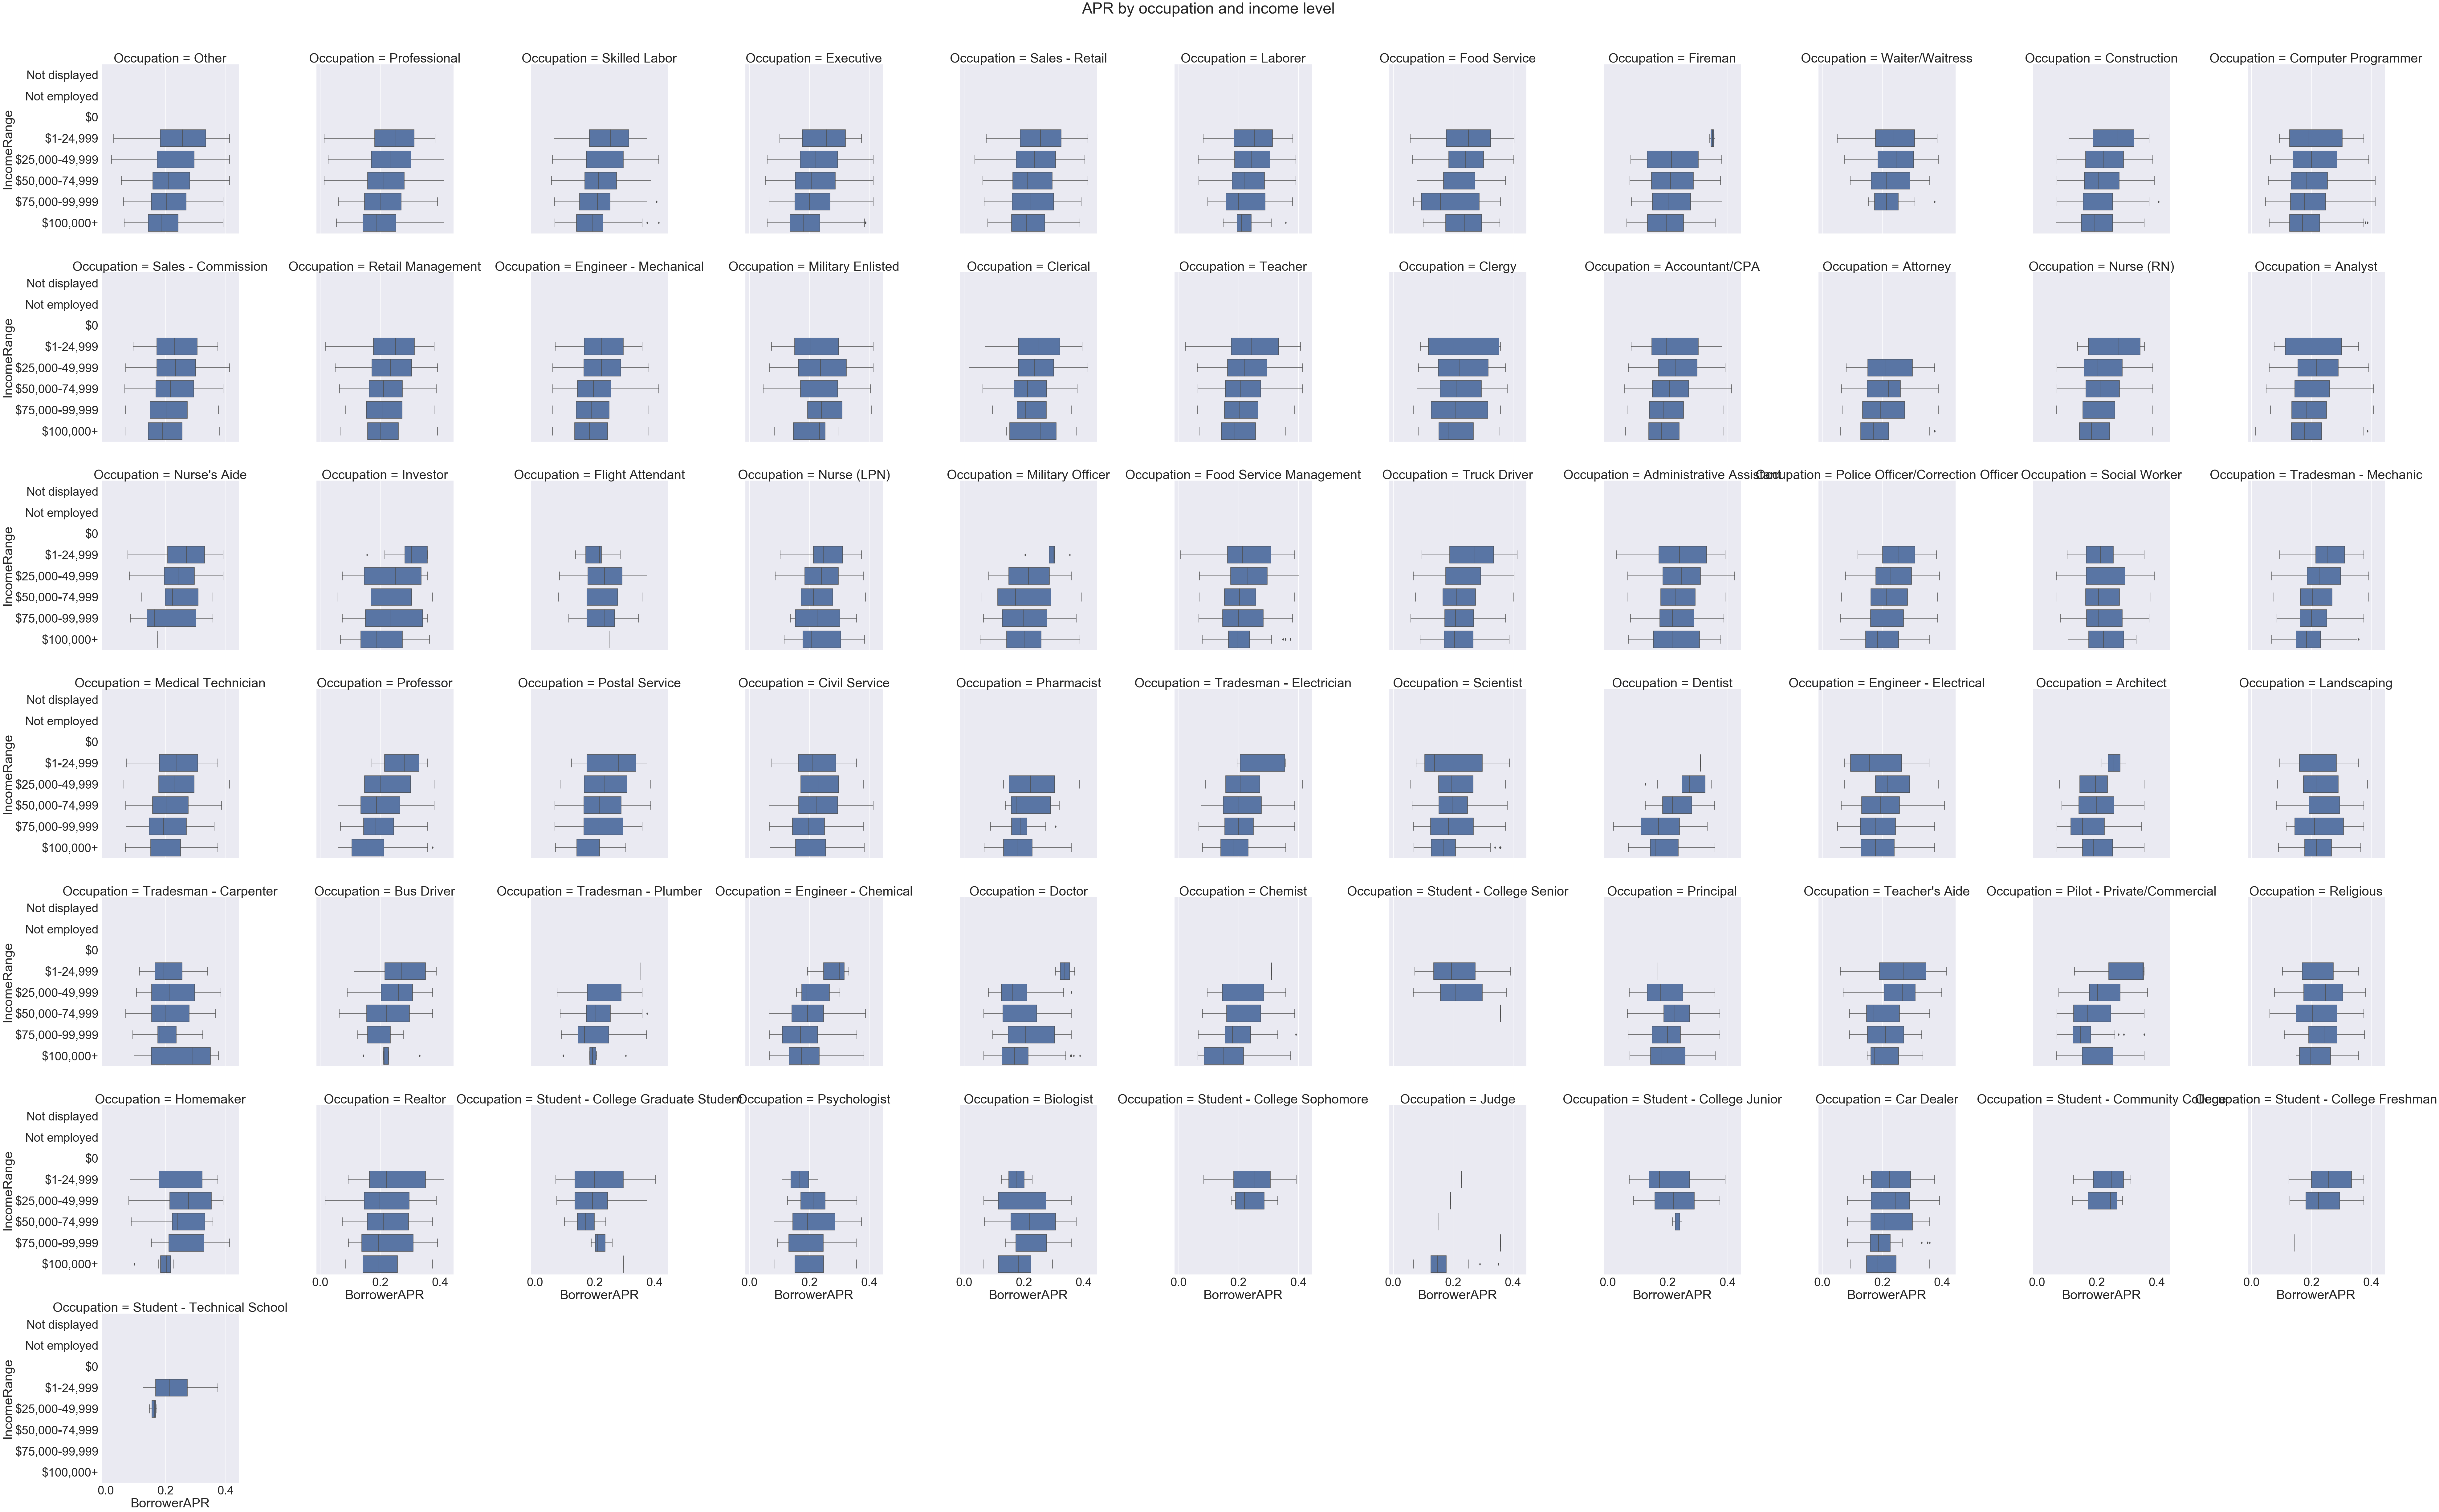

In [72]:
sb.set(font_scale=3.5)
g = sb.FacetGrid(data = loan_data_clean, col = 'Occupation', height = 4, col_wrap = 11, size = 10)
g.map(sb.boxplot, 'BorrowerAPR', 'IncomeRange')
plt.subplots_adjust(top=0.94)
g.fig.suptitle('APR by occupation and income level');

In this faceting plot, we can check occupation one by one and see if the correlation between income range and APR is not showing for some. 

Some professions such as military enlisted or nurse don't have a gradual decrease of APR when going up the income range. The median APR for laborers goes up and down for different salary ranges, but never goes below 0.2%. For other professions such as police officer or Mechanical engineer, APR decreases gradually as income increases. Interestingly, professions such as computer programmer and analyst have APRs below 0.2% for most of their income ranges.

We are now going to focus on two specific professions that get different average APRs: nurses and analysts.

In [61]:
##We create an analyst dataframe
loan_data_analyst = loan_data_clean.query('Occupation == "Analyst"')

In [62]:
loan_data_analyst.head()

,ListingKey,CurrentDelinquencies,Occupation,Recommendations,ListingCategory (numeric),IsBorrowerHomeowner,CreditGrade,OpenRevolvingMonthlyPayment,OpenRevolvingAccounts,InquiriesLast6Months,PublicRecordsLast10Years,IncomeRange,StatedMonthlyIncome,Investors,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR
61,10223596029543318E1A9FB,20.0,Analyst,0,19,True,NaN,76.0,6,4.0,2.0,"$75,000-99,999",7108.333333,1,Current,36,2000,67.14,0.16324
77,0DFD35069860903300C7973,0.0,Analyst,0,6,True,NaN,210.0,6,2.0,0.0,"$75,000-99,999",6466.666667,114,Completed,36,5600,183.31,0.13109
95,0FFC3601335963354A35791,0.0,Analyst,0,1,True,NaN,422.0,6,0.0,1.0,"$100,000+",14833.333333,1,Current,36,20000,644.41,0.12691
142,349134175738976507325F1,1.0,Analyst,0,7,True,B,35.0,4,2.0,1.0,"$50,000-74,999",4750.000000,85,Chargedoff,36,2500,85.99,0.15882
159,10443478111401431D069C2,0.0,Analyst,0,2,False,NaN,70.0,3,0.0,0.0,"$25,000-49,999",3493.750000,146,Completed,36,3000,113.87,0.23808


In [63]:
##We create a sample to improve visibility in the plot.
loan_data_analyst = loan_data_analyst.sample(n=1000, random_state=1)

In [64]:
##WE add the loan original amount variable
z = loan_data_analyst.LoanOriginalAmount/200
z

83964    20.00
63700    17.54
98287    45.00
5578     25.00
15862    65.00
         ...  
31070    75.00
89259    75.00
60826    10.00
70742    27.50
24236    25.00
Name: LoanOriginalAmount, Length: 1000, dtype: float64

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

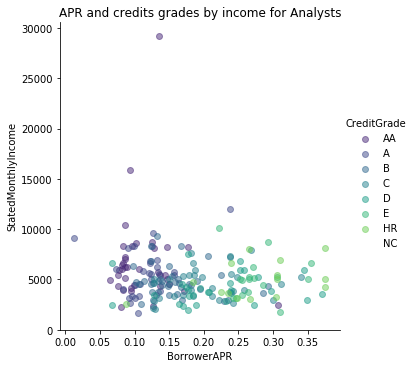

In [65]:
plt.figure(figsize = [10, 8])
g = sb.FacetGrid(data = loan_data_analyst, hue = 'CreditGrade',
                 palette = 'viridis', size = 5)
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome', alpha = 0.5)
tick_locs = [0.00, 0.05, 0.10, 3, 4, 5, 10, 20]
plt.title('APR and credits grades by income for Analysts');
g.add_legend();

In [66]:
#We take the same above step for nurses
loan_data_nurse = loan_data_clean.query('Occupation == "Nurse (RN)"')

In [67]:
loan_data_nurse = loan_data_nurse.sample(n=1000, random_state=1)

In [68]:
w = loan_data_analyst.LoanOriginalAmount/200
w

83964    20.00
63700    17.54
98287    45.00
5578     25.00
15862    65.00
         ...  
31070    75.00
89259    75.00
60826    10.00
70742    27.50
24236    25.00
Name: LoanOriginalAmount, Length: 1000, dtype: float64

<Figure size 720x576 with 0 Axes>

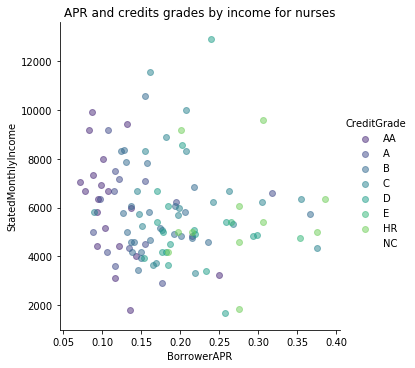

In [69]:
plt.figure(figsize = [10, 8])
g = sb.FacetGrid(data = loan_data_nurse, hue = 'CreditGrade',
                 palette = 'viridis', size = 5)
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome', alpha = 0.5)
plt.title('APR and credits grades by income for nurses');
g.add_legend();


In the two last graphs above we added credit grades to the analysis and focussed on analysts and nurses. We can see that the credit grade has a clear influence on APR level for both professions. Interestingly, onlya very few nurses get very low APR (in between 0.10 and 0.15). For those nurses who have an income inferior to $4000, a good credit grade seems compulsory to get such a low APR. Analyst with the same income range can get this level of APR even with a credit grade C or E.

<Figure size 720x576 with 0 Axes>

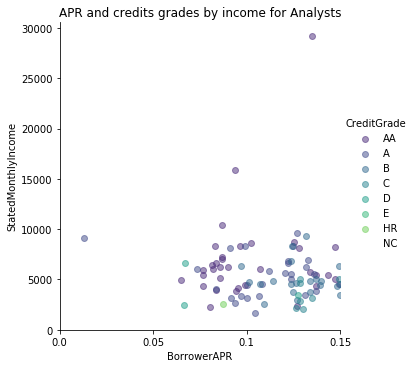

In [70]:
plt.figure(figsize = [10, 8])
g = sb.FacetGrid(data = loan_data_analyst, hue = 'CreditGrade',
                 palette = 'viridis', size = 5)
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome', alpha = 0.5)
tick_locs7 = [0.00, 0.05, 0.10, 0.15];
plt.xticks(tick_locs7, tick_locs7);
plt.xlim(0.00, 0.15)
plt.title('APR and credits grades by income for Analysts');
g.add_legend();

<Figure size 720x576 with 0 Axes>

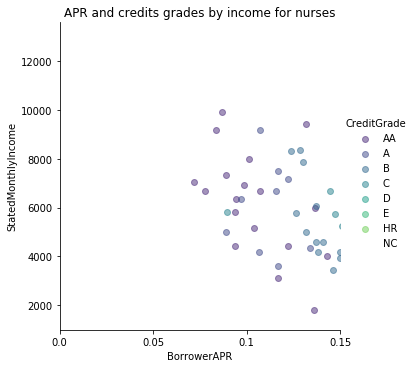

In [71]:
plt.figure(figsize = [10, 8])
g = sb.FacetGrid(data = loan_data_nurse, hue = 'CreditGrade',
                 palette = 'viridis', size = 5)
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome', alpha = 0.5)
tick_locs7 = [0.00, 0.05, 0.10, 0.15];
plt.xticks(tick_locs7, tick_locs7);
plt.xlim(0.00, 0.15)
plt.title('APR and credits grades by income for nurses');
g.add_legend();

In the two graphs above, we focussed on the spread of points for analysts and nurses, for a 0.00 to 0.15 borrower APR range only. In this foccussed view, it is very visible that nurses won't get a borrower APR below 0.5%. If nurses manage to get an APR between 0.05% and 0.1%, their credit grade need to be a "B" at the very least. For analysts, getting an APR of 0.5% or lower is possible even with a "C" or lower credit grade.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate analysis confirmed strongly that income range and APR levels are correlated. oing into a deeper analysis of professions and APR we understood that the profession of the borrower impacts their APR and same levels of income are treated differently depending on occupation.

### Were there any interesting or surprising interactions between features?

> Borrowers can get a chance at getting a lower APR by having a strong credit grade, even with low income and defavorited occupations.

## Conclusion

> The multivariate analysis confirmed strongly that income range and APR levels are correlated. Going into a deeper analysis of professions and APR we understood that the profession of the borrower impacts their APR and same levels of income are treated differently depending on occupation.

> Borrowers can get a chance at getting a lower APR by having a strong credit grade, even with low income and defavorited occupations.